In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dropout, Dense
from keras.utils import to_categorical
from keras import optimizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
dftrain = pd.read_csv('sign_mnist_train.csv')

In [3]:
dftrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train = np.array(dftrain)

In [5]:
train.shape

(27455, 785)

In [6]:
train = train[:,1:]

In [7]:
train.shape

(27455, 784)

In [8]:
train = train/255

In [9]:
train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

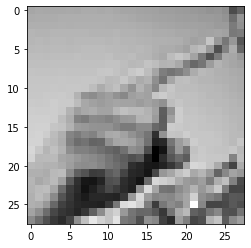

In [10]:
plt.imshow(np.reshape(train[1,:],(28,28)),'gray')

In [11]:
tr = np.reshape(train,(27455,28,28,1))

In [12]:
tr.shape

(27455, 28, 28, 1)

In [13]:
X_train = tr
Y_train = np.array(dftrain['label'])

In [14]:
Y_train

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [15]:
Y_train = to_categorical(Y_train)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
test = pd.read_csv('sign_mnist_test.csv')

In [18]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [19]:
X_test = np.array(test)

In [20]:
X_test.shape

(7172, 785)

In [21]:
X_test

array([[  6, 149, 149, ..., 112, 120, 107],
       [  5, 126, 128, ..., 184, 182, 180],
       [ 10,  85,  88, ..., 225, 224, 222],
       ...,
       [  2, 190, 191, ..., 211, 209, 208],
       [  4, 201, 205, ...,  67,  70,  63],
       [  2, 173, 174, ..., 195, 193, 192]], dtype=int64)

In [22]:
Y_test = np.array(test['label'])

In [23]:
Y_test = to_categorical(Y_test)

In [24]:
X_test = X_test[:,1:]

In [25]:
X_test.shape

(7172, 784)

In [26]:
X_test = X_test/255

In [27]:
X_test = np.reshape(X_test,(7172,28,28,1))

In [28]:
print(X_train.shape,'\t',Y_train.shape)
print(X_test.shape,'\t',Y_test.shape)

(27455, 28, 28, 1) 	 (27455, 25)
(7172, 28, 28, 1) 	 (7172, 25)


In [29]:
# Fitting CNN

model = Sequential()
model.add(Conv2D(8, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(25, activation='softmax'))

W1221 15:06:23.796979 11044 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, Y_train,validation_split = 0.33, epochs=7, verbose=1)

W1221 15:06:26.921630 11044 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 18394 samples, validate on 9061 samples
Epoch 1/7
18394/18394 [==============================] - 58s 3ms/step - loss: 1.5682 - accuracy: 0.5569 - val_loss: 0.6789 - val_accuracy: 0.8081
Epoch 2/7
18394/18394 [==============================] - 49s 3ms/step - loss: 0.4672 - accuracy: 0.8662 - val_loss: 0.3382 - val_accuracy: 0.9072
Epoch 3/7
18394/18394 [==============================] - 58s 3ms/step - loss: 0.2210 - accuracy: 0.9458 - val_loss: 0.1459 - val_accuracy: 0.9742
Epoch 4/7
18394/18394 [==============================] - 55s 3ms/step - loss: 0.1040 - accuracy: 0.9805 - val_loss: 0.0745 - val_accuracy: 0.9903
Epoch 5/7
18394/18394 [==============================] - 58s 3ms/step - loss: 0.0481 - accuracy: 0.9962 - val_loss: 0.0320 - val_accuracy: 0.9994
Epoch 6/7
18394/18394 [==============================] - 52s 3ms/step - loss: 0.0255 - accuracy: 0.9994 - val_loss: 0.0186 - val_accuracy: 0.9997
Epoch 7/7
18394/18394 [==============================] - 57s 3ms/step - los

In [32]:
model.evaluate(X_test,Y_test)

7172/7172 [==============================] - 15s 2ms/step


[0.5805380787768978, 0.8577802777290344]

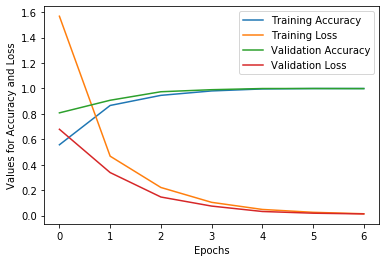

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Values for Accuracy and Loss')
plt.legend(['Training Accuracy','Training Loss','Validation Accuracy','Validation Loss'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                10025     
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
__________________________________________________

In [36]:
model.save("Sign-language-MNIST_Trained_Model.h5")